# Simple RNN

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
 
# Import IMDB dataset:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)
 
# Pad sequences:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Architecture 
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilation
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training
epochs=10
batch_size=128
validation_split=0.2

history = model.fit(x=input_train, y=y_train, batch_size=batch_size, 
                    epochs=epochs, validation_split=validation_split)

history_dict = history.history

Epoch 1/10
157/157 [==============================] - 55s 351ms/step - loss: 0.6044 - accuracy: 0.6597 - val_loss: 0.4657 - val_accuracy: 0.7988
Epoch 2/10
157/157 [==============================] - 55s 353ms/step - loss: 0.3892 - accuracy: 0.8368 - val_loss: 0.4469 - val_accuracy: 0.7960
Epoch 3/10
157/157 [==============================] - 56s 355ms/step - loss: 0.2955 - accuracy: 0.8821 - val_loss: 0.6166 - val_accuracy: 0.7414
Epoch 4/10
157/157 [==============================] - 54s 346ms/step - loss: 0.2241 - accuracy: 0.9141 - val_loss: 0.3656 - val_accuracy: 0.8556
Epoch 5/10
157/157 [==============================] - 55s 352ms/step - loss: 0.1572 - accuracy: 0.9424 - val_loss: 0.4140 - val_accuracy: 0.8572
Epoch 6/10
157/157 [==============================] - 55s 352ms/step - loss: 0.1039 - accuracy: 0.9642 - val_loss: 0.4077 - val_accuracy: 0.8630
Epoch 7/10
157/157 [==============================] - 55s 350ms/step - loss: 0.0640 - accuracy: 0.9801 - val_loss: 0.5152 - val_ac

In [ ]:
# Plot the results
import matplotlib.pyplot as plt
import numpy as np


def plot_results(net_history_dict, num_epochs):
  epochs = np.arange(0, num_epochs)

  # Plot loss
  plt.subplot(2, 1, 1)
  plt.plot(epochs, net_history_dict['loss'], 'bs', net_history_dict['val_loss'], 'rs')
  plt.plot(epochs, net_history_dict['loss'], net_history_dict['val_loss'])
  plt.xlabel('Epoch'), plt.ylabel('Loss')
  plt.title('Training / validation loss and accuracy')
  plt.legend(('Train loss', 'Val loss'))
  plt.xticks(epochs)
  plt.grid(True)

  # Plot accuracy
  plt.subplot(2, 1, 2)
  plt.plot(epochs, net_history_dict['accuracy'], 'bs', net_history_dict['val_accuracy'], 'rs')
  plt.plot(epochs, net_history_dict['accuracy'], net_history_dict['val_accuracy']) 
  plt.xlabel('Epoch'), plt.ylabel('Accuracy')
  plt.legend(('Train acc', 'Val acc'))
  plt.xticks(epochs)
  plt.grid(True)

  plt.show()

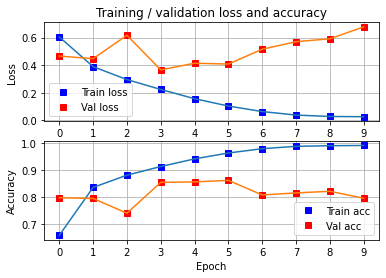

In [ ]:
plot_results(history_dict, epochs)

# LSTM

In [ ]:
from keras.layers import LSTM

# Architecture 
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 32))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilation
model_lstm.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history_lstm = model_lstm.fit(x=input_train, y=y_train, batch_size=batch_size, 
                              epochs=epochs, validation_split=validation_split)

history_lstm_dict = history_lstm.history

Epoch 1/10
157/157 [==============================] - 5s 33ms/step - loss: 0.5187 - accuracy: 0.7582 - val_loss: 0.4176 - val_accuracy: 0.8270
Epoch 2/10
157/157 [==============================] - 5s 30ms/step - loss: 0.3010 - accuracy: 0.8801 - val_loss: 0.3518 - val_accuracy: 0.8496
Epoch 3/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2375 - accuracy: 0.9101 - val_loss: 0.4952 - val_accuracy: 0.8550
Epoch 4/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2077 - accuracy: 0.9234 - val_loss: 0.2889 - val_accuracy: 0.8896
Epoch 5/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1751 - accuracy: 0.9370 - val_loss: 0.4621 - val_accuracy: 0.8512
Epoch 6/10
157/157 [==============================] - 5s 31ms/step - loss: 0.1621 - accuracy: 0.9419 - val_loss: 0.3205 - val_accuracy: 0.8790
Epoch 7/10
157/157 [==============================] - 5s 31ms/step - loss: 0.1466 - accuracy: 0.9487 - val_loss: 0.4211 - val_accuracy: 0.8530

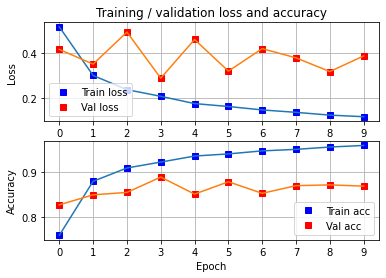

In [ ]:
plot_results(history_lstm_dict, epochs)

**Comparing Simple RNN vs. LSTM**

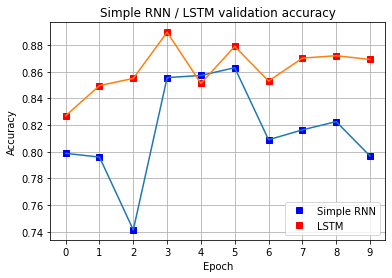

In [ ]:
  # Plot accuracy
  epochs = np.arange(0, 10)
  plt.plot(epochs, history_dict['val_accuracy'], 'bs', history_lstm_dict['val_accuracy'], 'rs')
  plt.plot(epochs, history_dict['val_accuracy'], history_lstm_dict['val_accuracy']) 
  plt.xlabel('Epoch'), plt.ylabel('Accuracy')
  plt.title('Simple RNN / LSTM validation accuracy')
  plt.legend(('Simple RNN', 'LSTM'))
  plt.xticks(epochs)
  plt.grid(True)

  plt.show()